a) Write a Python program to determine if a given Joint PMF corresponds to independent random variables (X,Y) or not. Take the range of values of random variables X and Y as the input and then take the Joint PMF as the input. Assume X and Y take finite number of values.

b) Plot the Joint PMF and the corresponding Joint CDF. Also, determine and plot the two Marginal PMFs and Marginal CDFs.

c) Determine the value of E[XY]. If X1=X-E[X] and Y1=Y-E[Y], determine E[X1Y1].

In [ ]:
def independent(j_p,m_x,m_y):
  statement=True
  for k in range(len(m_x)):
    for j in range(len(m_y)):
      if m_x[k]*m_y[j]!=j_p[j][k]:
        statement=False
        return "The joint pmf is not a independent random variable (X,Y)"
  if statement==True:
    return "The joint pmf is a independent random variable (X,Y)"

No of different elemnts in X::3
No of different elements in Y::2
tell the number of elements in for x=1,y=1::0.1
tell the number of elements in for x=2,y=1::0.2
tell the number of elements in for x=3,y=1::0.3
tell the number of elements in for x=1,y=2::0.15
tell the number of elements in for x=2,y=2::0.15
tell the number of elements in for x=3,y=2::0.1


JOINT PMF TABLE
Y X 1    2    3    
1  0.1 0.2 0.3 
2  0.15 0.15 0.1 


JOINT CDF TABLE
Y X 1    2    3    
1  0.1 0.3 0.6 
2  0.25 0.6 1.0 


The joint pmf is not a independent random variable (X,Y)




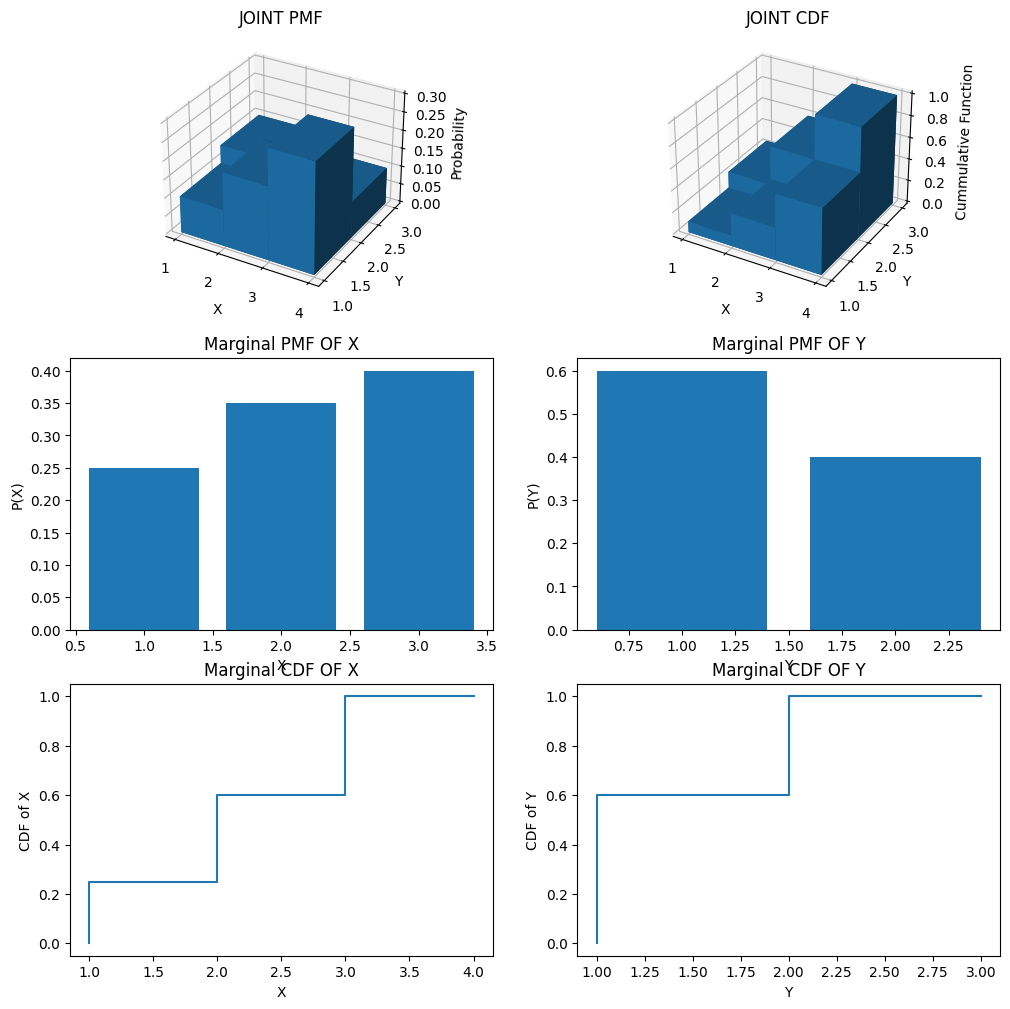

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=int(input("No of different elemnts in X::"))
y=int(input("No of different elements in Y::"))
c=0
j_p=[]
for k in range(1,y+1):
  p_y=[]
  for j in range(1,x+1):
    p=float(input(f"tell the number of elements in for x={j},y={k}::"))
    c=c+p
    p_y.append(p)
  j_p.append(p_y)
print()
print()
print("JOINT PMF TABLE")
print("Y",end=" X ")
for k in range(len(j_p[0])):
  print(k+1,end="    ")
print()
for k in range(len(j_p)):
  print(k+1,end="  ")
  for j in range(len(j_p[0])):
    j_p[k][j]=j_p[k][j]/c
    print(round(j_p[k][j],2),end=" ")
  print()
print()
print()
print("JOINT CDF TABLE")
print("Y",end=" X ")
for k in range(len(j_p[0])):
  print(k+1,end="    ")
print()
cdf=[]
for k in range(1,y+1):
  print(k,end="  ")
  c_y=[]
  for j in range(1,x+1):
    c=0
    for i in range(k):
      for l in range(j):
        c=c+j_p[i][l]
    print(round(c,2),end=" ")
    c_y.append(c)
  cdf.append(c_y)
  print()
print()
print()

m_x=[]
for k in range(len(j_p[0])):
  c=0
  for j in range(len(j_p)):
    c=c+j_p[j][k]
  m_x.append(c)

cmx=[0]
c=0
for k in range(len(m_x)):
  c=c+m_x[k]
  cmx.append(c)

m_y=[]
for k in range(len(j_p)):
  c=0
  for j in range(len(j_p[0])):
    c=c+j_p[k][j]
  m_y.append(c)

cmy=[0]
c=0
for k in range(len(m_y)):
  c=c+m_y[k]
  cmy.append(c)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(321, projection='3d')
ax2 = fig.add_subplot(322, projection='3d')
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

print(independent(j_p,m_x,m_y))
print()
print()
_xx, _yy = np.meshgrid(list(range(1,x+1)), list(range(1,y+1)))
_x, _y = _xx.ravel(), _yy.ravel()
j_p=np.array(j_p)
j_p=j_p.ravel()
cdf=np.array(cdf)
cdf=cdf.ravel()
m_x=np.array(m_x)
m_x=m_x.ravel()
m_y=np.array(m_y)
m_y=m_y.ravel()
x_p=list(range(1,x+1))
x_p=np.array(x_p)
x_p=x_p.ravel()
y_p=list(range(1,y+1))
y_p=np.array(y_p)
y_p=y_p.ravel()
bottom = np.zeros_like(x*y)
width = depth = 1

ax1.bar3d(_x, _y, bottom, width, depth, j_p, shade=True)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Probability")
ax1.set_title('JOINT PMF')

ax2.bar3d(_x, _y, bottom, width, depth, cdf, shade=True)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Cummulative Function")
ax2.set_title('JOINT CDF')

ax3.bar(x_p,m_x)
ax3.set_xlabel("X")
ax3.set_ylabel("P(X)")
ax3.set_title("Marginal PMF OF X")

ax4.bar(y_p,m_y)
ax4.set_xlabel("Y")
ax4.set_ylabel("P(Y)")
ax4.set_title("Marginal PMF OF Y")

x_p_2=list(range(1,x+2))
y_p_2=list(range(1,y+2))

ax5.step(x_p_2,cmx)
ax5.set_xlabel("X")
ax5.set_ylabel("CDF of X")
ax5.set_title("Marginal CDF OF X")

ax6.step(y_p_2,cmy)
ax6.set_xlabel("Y")
ax6.set_ylabel("CDF of Y")
ax6.set_title("Marginal CDF OF Y")
plt.show()

In [ ]:
j_p=j_p.reshape(y,x)
e_xy=0
for k in range(x):
  for j in range(y):
    e_xy=e_xy+((k+1)*(j+1)*(j_p[j][k]))
print("E[XY] = ",e_xy)
e_x=0
for k in range(x):
  e_x=e_x+((k+1)*m_x[k])
e_y=0
for k in range(y):
  e_y=e_y+((k+1)*m_y[k])
print("E[X1Y1] = ",e_xy-(e_x*e_y))

NameError: name 'j_p' is not defined